## Task:

#### I decided to treat this as a classification problem by creating a new binary variable affair (did the woman have at least one affair?) and trying to predict the classification for each woman.

Description of Variables

The dataset contains 6366 observations of 9 variables:

rate_marriage: woman's rating of her marriage (1 = very poor, 5 =
very good)

age: woman's age

yrs_married: number of years married

children: number of children

religious: woman's rating of how religious she is (1 = not religious, 4 =

strongly religious)

educ: level of education (9 = grade school, 12 = high school, 14 =

some college, 16 = college graduate, 17 = some graduate school, 20
= advanced degree)

occupation: woman's occupation (1 = student, 2 = farming/semi-
skilled/unskilled, 3 = "white collar", 4 =
teacher/nurse/writer/technician/skilled, 5 = managerial/business, 6 =
professional with advanced degree)

occupation_husb: husband's occupation (same coding as above)

affairs: time spent in extra-marital affairs

In [9]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
#from sklearn.cross_validation import cross_val_score
from sklearn import metrics

In [10]:
dta = sm.datasets.fair.load_pandas().data

In [11]:
dta.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [12]:
#add "affair" column: 1 represents having affairs, 0represents not 
dta['affair'] = (dta.affairs > 0).astype(int)

In [13]:
dta.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


In [14]:
dta.shape

(6366, 10)

In [60]:
dta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rate_marriage    6366 non-null   float64
 1   age              6366 non-null   float64
 2   yrs_married      6366 non-null   float64
 3   children         6366 non-null   float64
 4   religious        6366 non-null   float64
 5   educ             6366 non-null   float64
 6   occupation       6366 non-null   float64
 7   occupation_husb  6366 non-null   float64
 8   affairs          6366 non-null   float64
 9   affair           6366 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 497.5 KB


In [62]:
dta.isnull().sum()

rate_marriage      0
age                0
yrs_married        0
children           0
religious          0
educ               0
occupation         0
occupation_husb    0
affairs            0
affair             0
dtype: int64

In [63]:
dta.isna().sum()

rate_marriage      0
age                0
yrs_married        0
children           0
religious          0
educ               0
occupation         0
occupation_husb    0
affairs            0
affair             0
dtype: int64

In [61]:
dta.describe()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865,3.424128,3.850141,0.705374,0.322495
std,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003,0.942399,1.346435,2.203374,0.467468
min,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000,0.000000
25%,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.000000,0.000000
75%,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,4.000000,5.000000,0.484848,1.000000
max,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,6.000000,6.000000,57.599991,1.000000


In [17]:
dta.loc[dta['affairs']==0]

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
2053,4.0,32.0,9.0,2.0,3.0,14.0,2.0,4.0,0.0,0
2054,4.0,27.0,6.0,0.0,2.0,14.0,3.0,4.0,0.0,0
2055,4.0,22.0,2.5,0.0,2.0,14.0,3.0,2.0,0.0,0
2056,5.0,42.0,23.0,4.0,3.0,16.0,3.0,5.0,0.0,0
2057,5.0,27.0,2.5,1.0,3.0,20.0,2.0,2.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...
6361,5.0,32.0,13.0,2.0,3.0,17.0,4.0,3.0,0.0,0
6362,4.0,32.0,13.0,1.0,1.0,16.0,5.0,5.0,0.0,0
6363,5.0,22.0,2.5,0.0,2.0,14.0,3.0,1.0,0.0,0
6364,5.0,32.0,6.0,1.0,3.0,14.0,3.0,4.0,0.0,0


In [18]:
dta['affair'].value_counts()

0    4313
1    2053
Name: affair, dtype: int64

In [20]:
y, X = dmatrices('affair ~ rate_marriage + age +yrs_married + children + religious + educ +C(occupation) + C(occupation_husb)',dta, return_type="dataframe")

Okay,that's something fancy here!This is the best way of doing one-hot encoding.

In [21]:
y.head()

,affair
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


In [22]:
X.head()

,Intercept,C(occupation)[T.2.0],C(occupation)[T.3.0],C(occupation)[T.4.0],C(occupation)[T.5.0],C(occupation)[T.6.0],C(occupation_husb)[T.2.0],C(occupation_husb)[T.3.0],C(occupation_husb)[T.4.0],C(occupation_husb)[T.5.0],C(occupation_husb)[T.6.0],rate_marriage,age,yrs_married,children,religious,educ
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0


In [27]:
X.loc[X.Intercept!=1]

,Intercept,C(occupation)[T.2.0],C(occupation)[T.3.0],C(occupation)[T.4.0],C(occupation)[T.5.0],C(occupation)[T.6.0],C(occupation_husb)[T.2.0],C(occupation_husb)[T.3.0],C(occupation_husb)[T.4.0],C(occupation_husb)[T.5.0],C(occupation_husb)[T.6.0],rate_marriage,age,yrs_married,children,religious,educ


In [31]:
dta.corr()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
rate_marriage,1.000000,-0.111127,-0.128978,-0.129161,0.078794,0.079869,0.039528,0.027745,-0.178068,-0.331776
age,-0.111127,1.000000,0.894082,0.673902,0.136598,0.027960,0.106127,0.162567,-0.089964,0.146519
yrs_married,-0.128978,0.894082,1.000000,0.772806,0.132683,-0.109058,0.041782,0.128135,-0.087737,0.203109
children,-0.129161,0.673902,0.772806,1.000000,0.141845,-0.141918,-0.015068,0.086660,-0.070278,0.159833
religious,0.078794,0.136598,0.132683,0.141845,1.000000,0.032245,0.035746,0.004061,-0.125933,-0.129299
educ,0.079869,0.027960,-0.109058,-0.141918,0.032245,1.000000,0.382286,0.183932,-0.017740,-0.075280
occupation,0.039528,0.106127,0.041782,-0.015068,0.035746,0.382286,1.000000,0.201156,0.004469,0.028981
occupation_husb,0.027745,0.162567,0.128135,0.086660,0.004061,0.183932,0.201156,1.000000,-0.015614,0.017637
affairs,-0.178068,-0.089964,-0.087737,-0.070278,-0.125933,-0.017740,0.004469,-0.015614,1.000000,0.464046
affair,-0.331776,0.146519,0.203109,0.159833,-0.129299,-0.075280,0.028981,0.017637,0.464046,1.000000


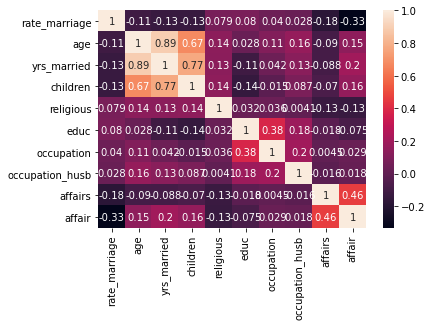

In [30]:
import seaborn as sns
sns.heatmap(dta.corr(), annot = True)

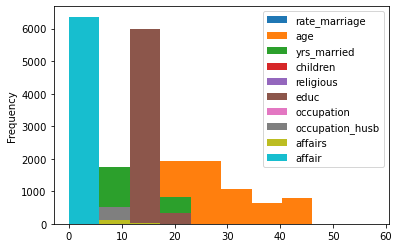

In [36]:
dta.plot(kind = 'hist')

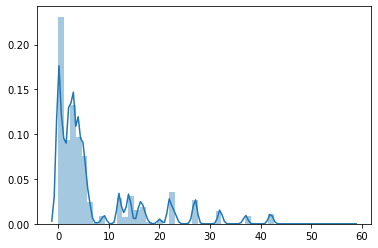

In [37]:
sns.distplot(dta)

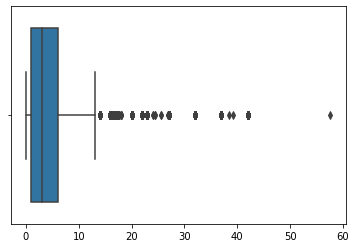

In [38]:
sns.boxplot(dta)

#### We can see that our data is neither normally distributed not it is balanced. And we have outliers as well in our data.

#### Univariate analysis

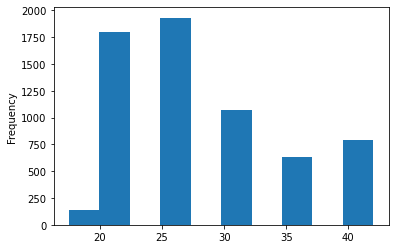

In [74]:
dta['age'].plot(kind= 'hist')

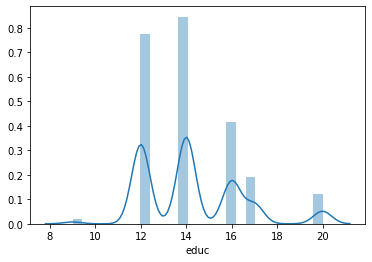

In [78]:
sns.distplot(dta['educ'])

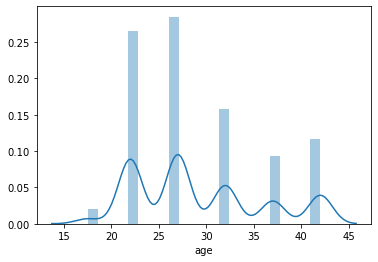

In [80]:
sns.distplot(dta['age'])

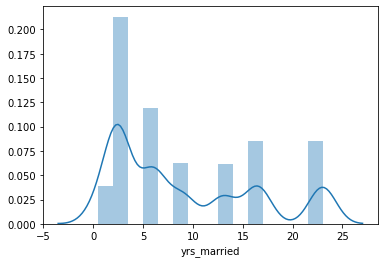

In [81]:
sns.distplot(dta['yrs_married'])

#### BIvariate analysis

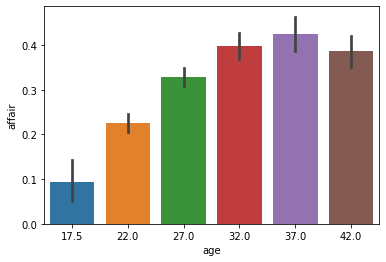

In [44]:
sns.barplot(x= dta.age, y=dta.affair)

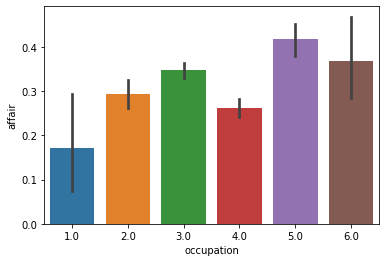

In [49]:
sns.barplot(x= dta.occupation, y=dta.affair)

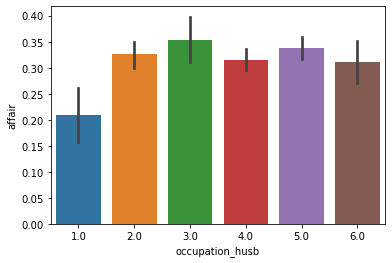

In [50]:
sns.barplot(x= dta.occupation_husb, y=dta.affair)

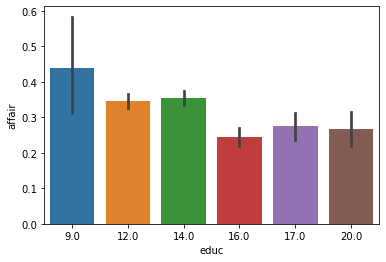

In [51]:
sns.barplot(x= dta.educ, y=dta.affair)

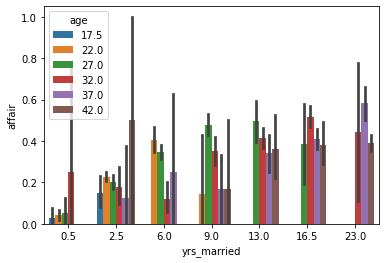

In [46]:
sns.barplot(x= dta.yrs_married, y=dta.affair, hue = dta.age)

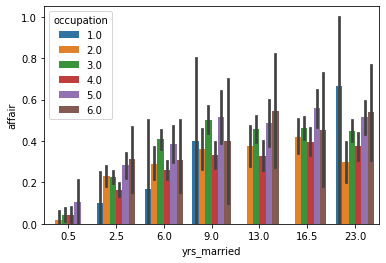

In [47]:
sns.barplot(x= dta.yrs_married, y=dta.affair, hue = dta.occupation)

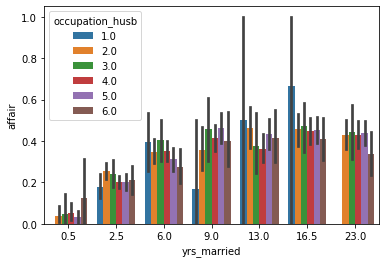

In [48]:
sns.barplot(x= dta.yrs_married, y=dta.affair, hue = dta.occupation_husb)

In [32]:
y = np.ravel(y)

In [33]:
y

array([1., 1., 1., ..., 0., 0., 0.])

In [34]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)  ## splitting the data into train and test

In [52]:
lcr = LogisticRegression()
lcr.fit(x_train, y_train)

/home/kavish/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [53]:
y_pred = lcr.predict(x_test)

In [55]:
print(metrics.classification_report(y_pred, y_test))

              precision    recall  f1-score   support

         0.0       0.90      0.74      0.81      1293
         1.0       0.36      0.65      0.46       299

    accuracy                           0.72      1592
   macro avg       0.63      0.69      0.64      1592
weighted avg       0.80      0.72      0.74      1592



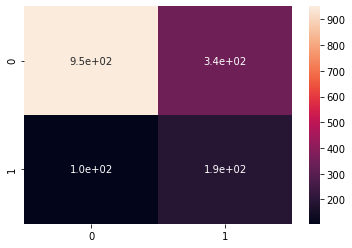

In [59]:
sns.heatmap(metrics.confusion_matrix(y_pred, y_test), annot = True)

We can see here our model is not performancing well on this data this is because our data is not normally distributed nor balanced and skewed and contains outliers as well.

And logistic regression is sensitive with respect to all these phenomenas. So first we need to deal with these to gain better performance.

In [82]:
from sklearn.preprocessing import StandardScaler

In [83]:
ssr = StandardScaler()
X_scaled = ssr.fit_transform(X)

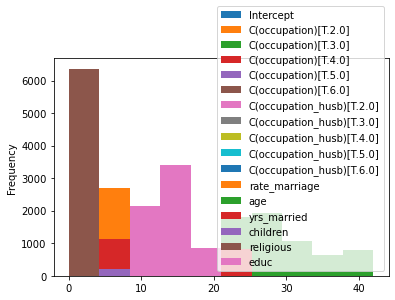

In [96]:
X.plot(kind = 'hist')

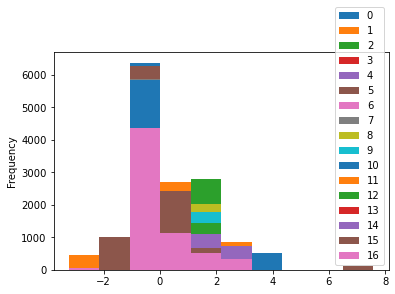

In [95]:
pd.DataFrame(X_scaled).plot(kind = 'hist')

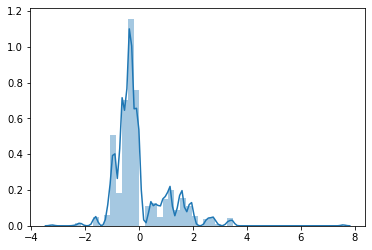

In [97]:
sns.distplot(pd.DataFrame(X_scaled))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7eff0c778c10>,
      dtype=object)

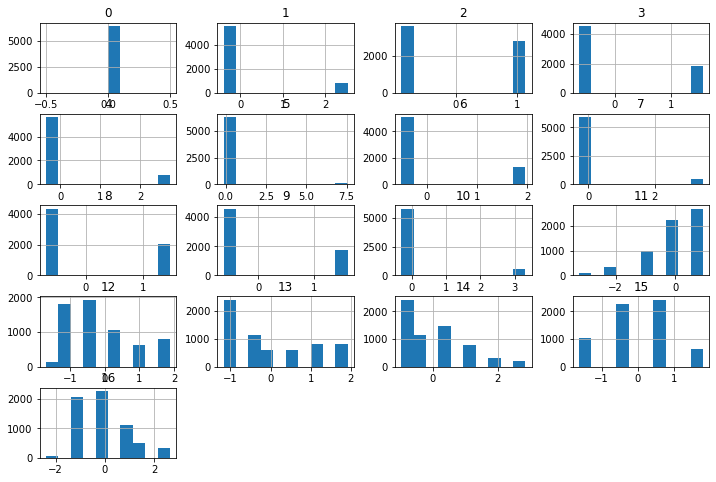

In [106]:
pd.DataFrame(X_scaled).hist(bins= None, figsize=(12,8))

In [90]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, y, test_size = 0.3)  

In [91]:
lcr.fit(X_train, Y_train)

LogisticRegression()

In [92]:
Y_pred = lcr.predict(X_test)

In [93]:
print(metrics.classification_report(Y_pred, Y_test))

              precision    recall  f1-score   support

         0.0       0.87      0.77      0.82      1511
         1.0       0.40      0.57      0.47       399

    accuracy                           0.73      1910
   macro avg       0.64      0.67      0.65      1910
weighted avg       0.77      0.73      0.75      1910



Now our model is performing slightly better than the previous one.To enhance its performance more we need to deal with outliers and it's imbalany. For that we can impute the outliers by it's mean/median or can randomly impute values using inerpolation.
And we can apply upsampling(as downsampling can eat our data and we only have samll data) to deal with unbalancy.

## Thanks!!